In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("merc.xlsx")

In [3]:
data.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
data.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

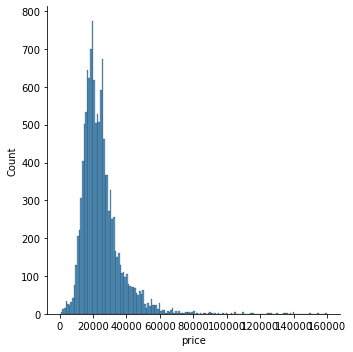

In [6]:
sns.displot(data["price"])
# outlier fiyatların üstesinden gelmeliyiz

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

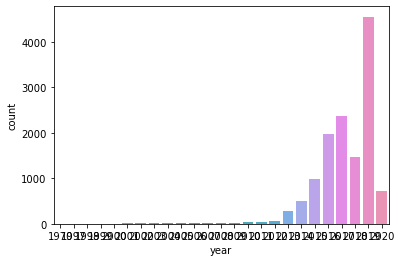

In [7]:
sns.countplot(data["year"])

<AxesSubplot:>

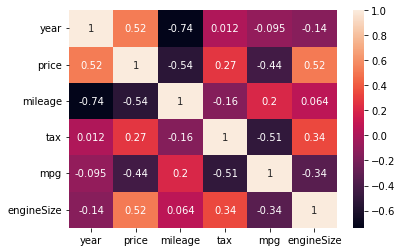

In [8]:
sns.heatmap(data.corr(), annot = True)

In [9]:
data.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

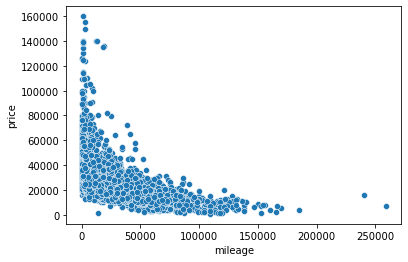

In [10]:
sns.scatterplot(x="mileage", y="price", data=data)

Yüksek fiyatlı araçları modelimizi bozmaması için verimizden çıkarabiliriz böylece daha doğru kararlar verebiliriz. Outlier verileri çıkarmak için verimizdeki en yüksek fiyatların %1'ini çıkarırsak 13119 adet verimizden 131 adet çıkarmış oluruz böylece verimiz genel hatlarıyla bozulmayacak ve daha sağlıklı kararlar verebilecek bir hal alacak.

In [11]:
data.sort_values("price", ascending=False).head(15)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [12]:
newData = data.sort_values("price", ascending=False).iloc[131:]

In [13]:
newData.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


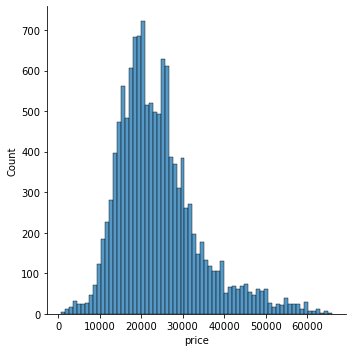

In [14]:
sns.displot(newData["price"])
#Daha normal bir dağılım elde etmiş olduk

In [15]:
newData.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

1970 yılında satılmış bir klasik araç yüksek fiyatla satılmış olmalı bu outlier da modellerimizin yanlış kararlar vermesine sebep olabilir.

In [16]:
newData = newData[newData.year != 1970]

In [17]:
newData.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [18]:
newData = newData.drop("transmission", axis=1)
# Tranmission sayısal değer olmadığından onu da verimizden çıkarıyoruz

In [19]:
data = newData
y = data["price"].values
x = data.drop("price", axis=1).values

In [20]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [21]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=10)

In [24]:
len(x_train)

9090

In [25]:
len(x_test)

3897

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
x_train = scaler.fit_transform(x_train)

In [29]:
x_test = scaler.transform(x_test)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
x_train.shape

(9090, 5)

In [32]:
model = Sequential()

model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [33]:
model.fit(x = x_train, y = y_train, validation_data=(x_test,y_test), batch_size=250, epochs=300,)

Epoch 1/300
37/37 [==============================] - 0s 3ms/step - loss: 672140992.0000 - val_loss: 688095488.0000
Epoch 2/300
37/37 [==============================] - 0s 1ms/step - loss: 672109952.0000 - val_loss: 688041216.0000
Epoch 3/300
37/37 [==============================] - 0s 1ms/step - loss: 672000320.0000 - val_loss: 687829376.0000
Epoch 4/300
37/37 [==============================] - 0s 1ms/step - loss: 671574528.0000 - val_loss: 687042304.0000
Epoch 5/300
37/37 [==============================] - 0s 1ms/step - loss: 670176960.0000 - val_loss: 684691712.0000
Epoch 6/300
37/37 [==============================] - 0s 1ms/step - loss: 666438784.0000 - val_loss: 678909440.0000
Epoch 7/300
37/37 [==============================] - 0s 1ms/step - loss: 657997248.0000 - val_loss: 666708032.0000
Epoch 8/300
37/37 [==============================] - 0s 1ms/step - loss: 641328256.0000 - val_loss: 643878912.0000
Epoch 9/300
37/37 [==============================] - 0s 1ms/step - loss: 6119139

37/37 [==============================] - 0s 1ms/step - loss: 61978492.0000 - val_loss: 63369780.0000
Epoch 73/300
37/37 [==============================] - 0s 1ms/step - loss: 61413780.0000 - val_loss: 62790580.0000
Epoch 74/300
37/37 [==============================] - 0s 1ms/step - loss: 60851128.0000 - val_loss: 62213912.0000
Epoch 75/300
37/37 [==============================] - 0s 1ms/step - loss: 60273216.0000 - val_loss: 61632516.0000
Epoch 76/300
37/37 [==============================] - 0s 1ms/step - loss: 59686564.0000 - val_loss: 61092484.0000
Epoch 77/300
37/37 [==============================] - 0s 1ms/step - loss: 59078488.0000 - val_loss: 60460776.0000
Epoch 78/300
37/37 [==============================] - 0s 1ms/step - loss: 58463368.0000 - val_loss: 59820796.0000
Epoch 79/300
37/37 [==============================] - 0s 1ms/step - loss: 57834392.0000 - val_loss: 59231924.0000
Epoch 80/300
37/37 [==============================] - 0s 1ms/step - loss: 57201600.0000 - val_loss: 5

37/37 [==============================] - 0s 1ms/step - loss: 24551598.0000 - val_loss: 25307884.0000
Epoch 144/300
37/37 [==============================] - 0s 1ms/step - loss: 24349388.0000 - val_loss: 25105270.0000
Epoch 145/300
37/37 [==============================] - 0s 1ms/step - loss: 24153742.0000 - val_loss: 24950690.0000
Epoch 146/300
37/37 [==============================] - 0s 1ms/step - loss: 23960654.0000 - val_loss: 24732568.0000
Epoch 147/300
37/37 [==============================] - 0s 1ms/step - loss: 23728558.0000 - val_loss: 24552746.0000
Epoch 148/300
37/37 [==============================] - 0s 1ms/step - loss: 23537746.0000 - val_loss: 24369884.0000
Epoch 149/300
37/37 [==============================] - 0s 1ms/step - loss: 23338306.0000 - val_loss: 24227620.0000
Epoch 150/300
37/37 [==============================] - 0s 1ms/step - loss: 23172568.0000 - val_loss: 24089556.0000
Epoch 151/300
37/37 [==============================] - 0s 1ms/step - loss: 23029822.0000 - val

37/37 [==============================] - 0s 1ms/step - loss: 19729692.0000 - val_loss: 21196934.0000
Epoch 215/300
37/37 [==============================] - 0s 1ms/step - loss: 19709228.0000 - val_loss: 21184578.0000
Epoch 216/300
37/37 [==============================] - 0s 1ms/step - loss: 19713400.0000 - val_loss: 21188904.0000
Epoch 217/300
37/37 [==============================] - 0s 1ms/step - loss: 19673056.0000 - val_loss: 21161222.0000
Epoch 218/300
37/37 [==============================] - 0s 1ms/step - loss: 19663314.0000 - val_loss: 21139902.0000
Epoch 219/300
37/37 [==============================] - 0s 1ms/step - loss: 19667296.0000 - val_loss: 21155678.0000
Epoch 220/300
37/37 [==============================] - 0s 1ms/step - loss: 19649398.0000 - val_loss: 21110812.0000
Epoch 221/300
37/37 [==============================] - 0s 1ms/step - loss: 19645894.0000 - val_loss: 21107876.0000
Epoch 222/300
37/37 [==============================] - 0s 1ms/step - loss: 19608976.0000 - val

37/37 [==============================] - 0s 1ms/step - loss: 18900198.0000 - val_loss: 20395510.0000
Epoch 286/300
37/37 [==============================] - 0s 1ms/step - loss: 18870564.0000 - val_loss: 20387674.0000
Epoch 287/300
37/37 [==============================] - 0s 1ms/step - loss: 18882054.0000 - val_loss: 20372032.0000
Epoch 288/300
37/37 [==============================] - 0s 1ms/step - loss: 18866070.0000 - val_loss: 20340910.0000
Epoch 289/300
37/37 [==============================] - 0s 1ms/step - loss: 18863582.0000 - val_loss: 20335336.0000
Epoch 290/300
37/37 [==============================] - 0s 1ms/step - loss: 18846586.0000 - val_loss: 20344012.0000
Epoch 291/300
37/37 [==============================] - 0s 1ms/step - loss: 18820376.0000 - val_loss: 20341964.0000
Epoch 292/300
37/37 [==============================] - 0s 1ms/step - loss: 18824542.0000 - val_loss: 20307806.0000
Epoch 293/300
37/37 [==============================] - 0s 1ms/step - loss: 18809712.0000 - val

In [34]:
lossData = pd.DataFrame(model.history.history)
lossData.head()

,loss,val_loss
0,672140992.0,688095488.0
1,672109952.0,688041216.0
2,672000320.0,687829376.0
3,671574528.0,687042304.0
4,670176960.0,684691712.0


<AxesSubplot:>

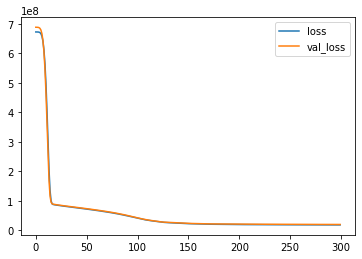

In [35]:
lossData.plot()

* Çizgiler yukardan başlayıp aşağıya doğru birlikte hareket ediyor mu?
* loss veya val_loss çizgisi aşağı doğru diğerinden ayrılmaya başlıyosa overfitting durumu var demektir model düzeltilmeli.

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
predictionArray = model.predict(x_test)

In [38]:
predictionArray

array([[22552.78 ],
       [23470.469],
       [25265.283],
       ...,
       [26561.148],
       [12850.55 ],
       [24957.84 ]], dtype=float32)

In [39]:
mean_absolute_error(y_test, predictionArray)

3208.368785585669

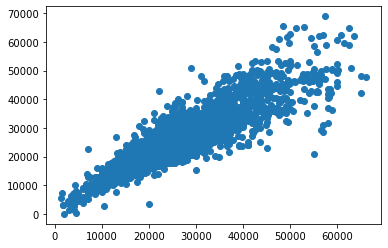

In [40]:
plt.scatter(y_test,predictionArray)

In [41]:
data.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [42]:
newCar = data.drop("price", axis=1).iloc[2]
newCar

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [43]:
newCar = scaler.transform(newCar.values.reshape(-1,5))

In [44]:
model.predict(newCar)

array([[63239.695]], dtype=float32)